# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", len(X_valid))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import cv2

# Visualizations will be shown in the notebook.
%matplotlib inline

def getSignNames():
    return pd.read_csv('./signnames.csv').values

def plotImages(X, y, examples_per_sign=15, squeeze=False, cmap=None):
    samples_per_sign = np.bincount(y)
    for sign in getSignNames():
        print("{0}. {1} - Samples: {2}".format(sign[0], sign[1], samples_per_sign[sign[0]]))
        sample_indices = np.where(y==sign[0])[0]
        random_samples = random.sample(list(sample_indices), examples_per_sign)
        fig = plt.figure(figsize = (examples_per_sign, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(examples_per_sign):
            image = X[random_samples[i]]
            axis = fig.add_subplot(1,examples_per_sign, i+1, xticks=[], yticks=[])
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()

In [7]:
#plotImages(X_train, y_train)
#plotImages(X_valid, y_valid)
#plotImages(X_test, y_test)

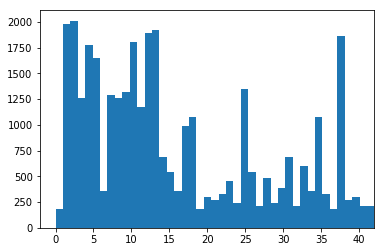

In [8]:
# plot the histogram
plt.hist(y_train, bins = n_classes)
plt.xlim(xmax=n_classes-1)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [9]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def getGrayScale(img):
    YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    return np.resize(YCrCb[:,:,0], (32,32,1))

def normalizeImage(img):
    a = -0.5
    b = 0.5
    minimum = 0
    maximum = 255
    return a + ((img - minimum) * (b - a)) / (maximum - minimum)

def preprocessImages(images):
    ret_array = []
    for img in images:
        ret_array.append(normalizeImage(getGrayScale(img)))
    return ret_array

X_train = preprocessImages(X_train)
X_valid = preprocessImages(X_valid)
X_test = preprocessImages(X_test)

0. Speed limit (20km/h) - Samples: 180


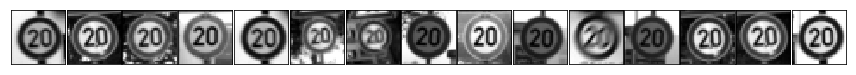

1. Speed limit (30km/h) - Samples: 1980


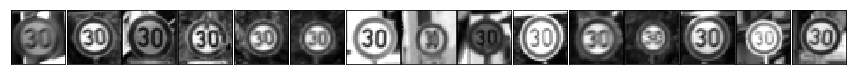

2. Speed limit (50km/h) - Samples: 2010


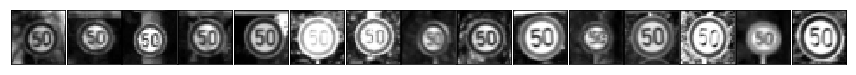

3. Speed limit (60km/h) - Samples: 1260


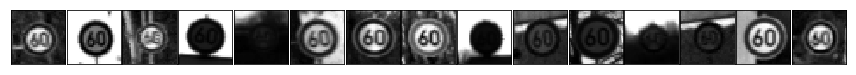

4. Speed limit (70km/h) - Samples: 1770


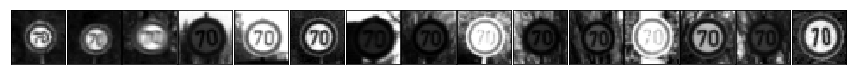

5. Speed limit (80km/h) - Samples: 1650


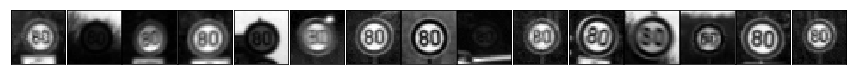

6. End of speed limit (80km/h) - Samples: 360


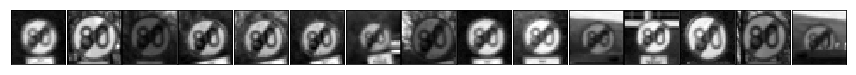

7. Speed limit (100km/h) - Samples: 1290


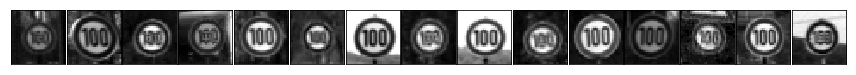

8. Speed limit (120km/h) - Samples: 1260


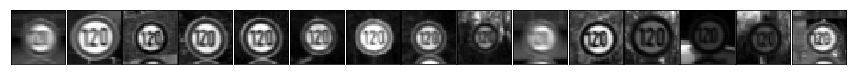

9. No passing - Samples: 1320


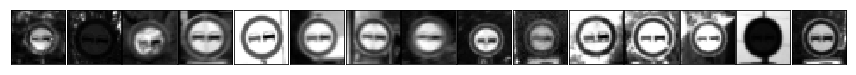

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


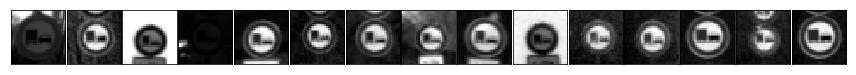

11. Right-of-way at the next intersection - Samples: 1170


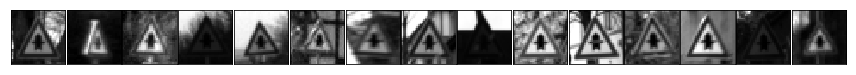

12. Priority road - Samples: 1890


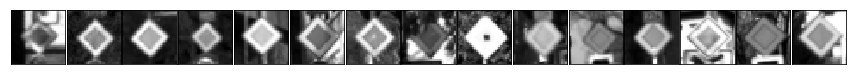

13. Yield - Samples: 1920


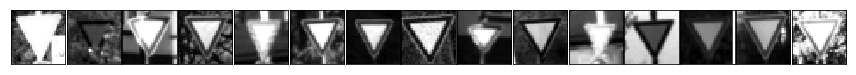

14. Stop - Samples: 690


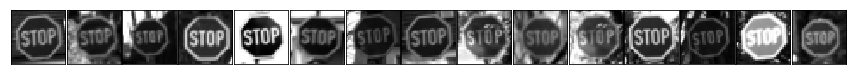

15. No vehicles - Samples: 540


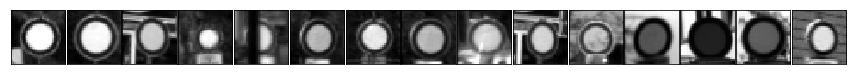

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


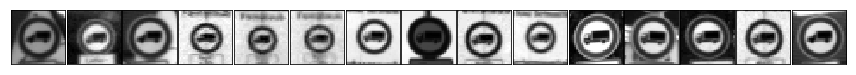

17. No entry - Samples: 990


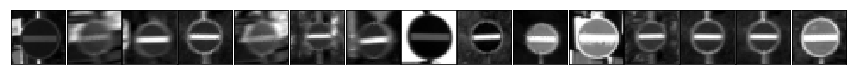

18. General caution - Samples: 1080


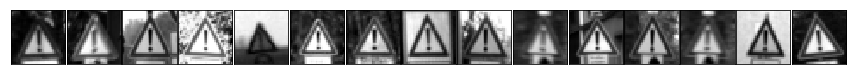

19. Dangerous curve to the left - Samples: 180


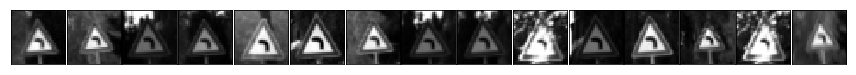

20. Dangerous curve to the right - Samples: 300


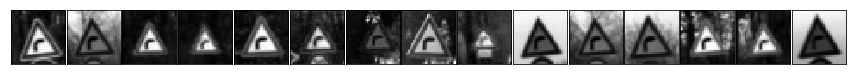

21. Double curve - Samples: 270


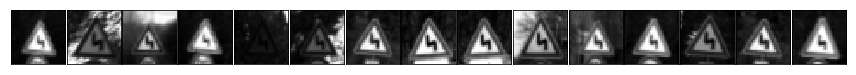

22. Bumpy road - Samples: 330


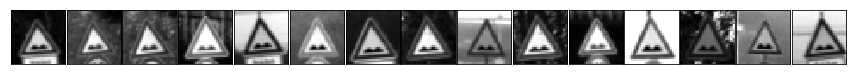

23. Slippery road - Samples: 450


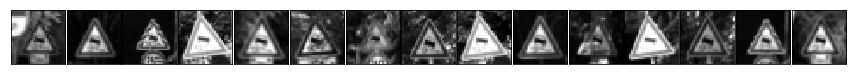

24. Road narrows on the right - Samples: 240


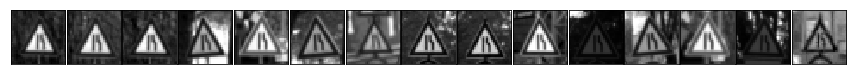

25. Road work - Samples: 1350


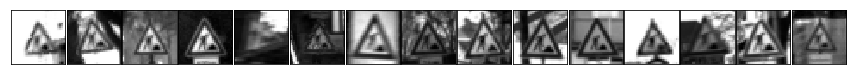

26. Traffic signals - Samples: 540


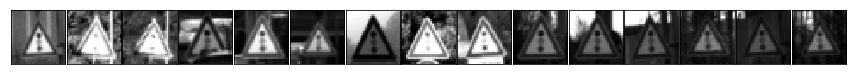

27. Pedestrians - Samples: 210


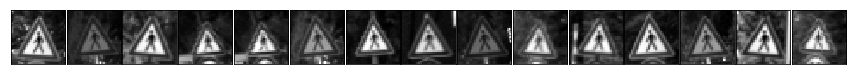

28. Children crossing - Samples: 480


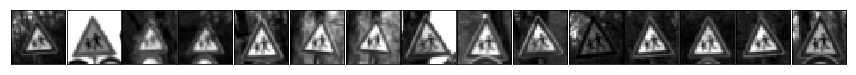

29. Bicycles crossing - Samples: 240


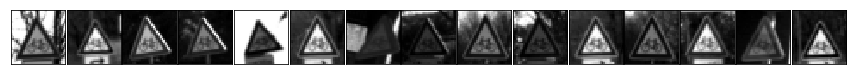

30. Beware of ice/snow - Samples: 390


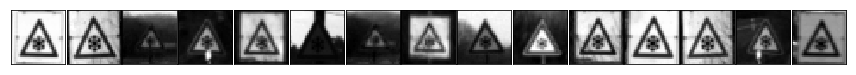

31. Wild animals crossing - Samples: 690


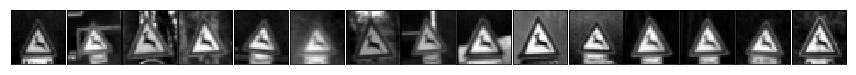

32. End of all speed and passing limits - Samples: 210


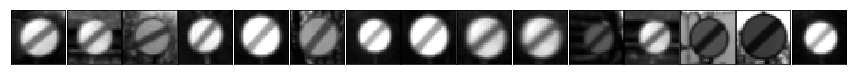

33. Turn right ahead - Samples: 599


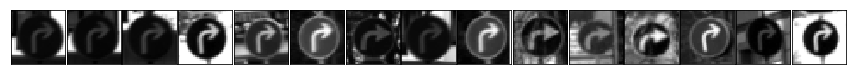

34. Turn left ahead - Samples: 360


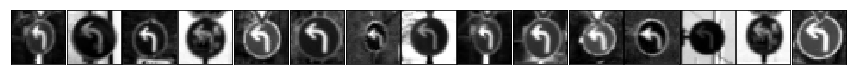

35. Ahead only - Samples: 1080


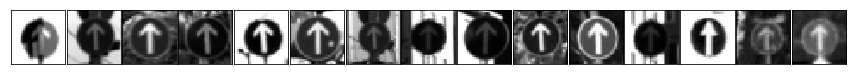

36. Go straight or right - Samples: 330


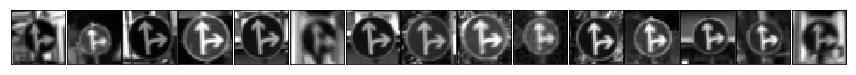

37. Go straight or left - Samples: 180


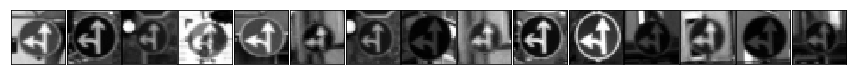

38. Keep right - Samples: 1860


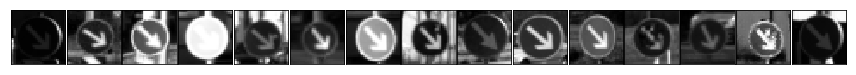

39. Keep left - Samples: 270


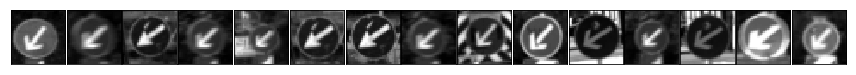

40. Roundabout mandatory - Samples: 300


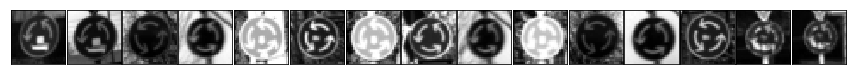

41. End of no passing - Samples: 210


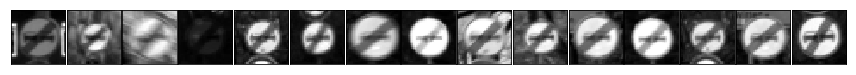

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


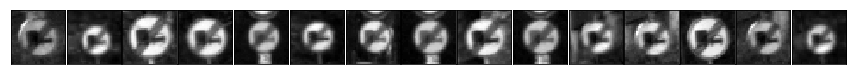

In [10]:
plotImages(X_train, y_train, squeeze=True, cmap='gray')
#plotImages(X_valid, y_valid, squeeze=True, cmap='gray')
#plotImages(X_test, y_test, squeeze=True, cmap='gray')

### Model Architecture

In [3]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import os
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle

def LeNet(x, num_labels):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Convolutional Layer. Input = 32x32x1. Output = 28x28x48.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 48), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros([48]))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # Max Pooling. Input = 28x28x48. Output = 14x14x48.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolutional Layer. Output = 10x10x96.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 48, 96), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros([96]))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # Max Pooling. Input = 10x10x96. Output = 5x5x96.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Layer. Input = 5x5x96. Output = 3x3x172.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 96, 172), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros([172]))
    conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Max Pooling. Input = 3x3x172. Output = 2x2x172.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    
    # Flatten. Input = 2x2x172. Output = 688.
    fc1 = flatten(conv3)
    
    # Fully Connected. Input = 688. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(688 , 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros([84]))
    fc2 = tf.nn.xw_plus_b(fc1, fc2_W, fc2_b)
    fc2 = tf.nn.relu(fc2)

    # Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, num_labels), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros([num_labels]))
    logits = tf.nn.xw_plus_b(fc2, fc3_W, fc3_b)
    
    return logits

# tf.one_hot() on windows in GPU mode failed with CUDA_ERROR_ILLEGAL_ADDRESS
# https://github.com/tensorflow/tensorflow/issues/6509
def one_hot_workaround(y, num_labels):
    sparse_labels = tf.reshape(y, [-1, 1])
    derived_size = tf.shape(sparse_labels)[0]
    indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
    concated = tf.concat(1, [indices, sparse_labels])
    outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(num_labels, [1])])
    return tf.sparse_to_dense(concated, outshape, 1.0, 0.0)

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# y_one_hot = tf.one_hot(y, n_classes)
#y_one_hot = one_hot_workaround(y, n_classes)
y_one_hot = tf.one_hot(y, n_classes)
logits = LeNet(x, n_classes)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_one_hot)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation)

NameError: name 'n_classes' is not defined

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

EPOCHS = 35
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    for i in range(EPOCHS):
        print("EPOCH {} ... ".format(i+1), end='')
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

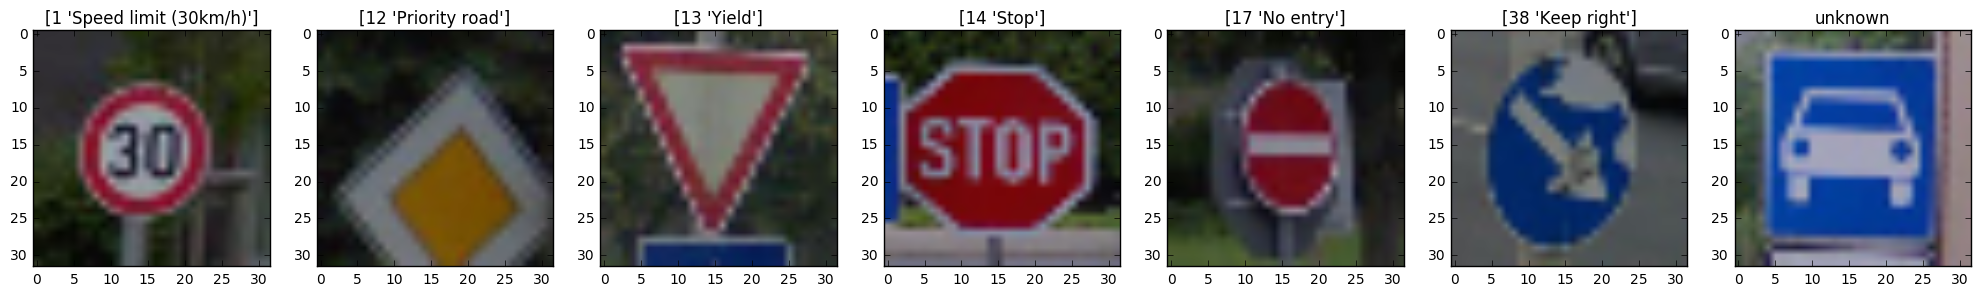

In [68]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

signs_from_web = []
labels = []

img_files = glob.glob('new_signs/*.jpg')
sign_names = getSignNames()

for file in img_files:
    # get label from file, first 2 digits of filename
    label = int(file.split('\\')[-1][:2])
    labels.append(label)
    img =  cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (32, 32)) 
    signs_from_web.append(resized_image)

def draw_images(data, images_per_line=7, squeeze=False, cmap=None):
    for offset in range(0, len(data), images_per_line):
        batch = data[offset:offset + images_per_line]
        fig = plt.figure(figsize = (25,5))
        for i in range(len(batch)):
            axis = fig.add_subplot(1, len(batch), i + 1)
            if labels[offset+i] < len(sign_names):
                axis.set_title(sign_names[labels[offset+i]])
            else:
                axis.set_title('unknown')
            image = batch[i]
            if squeeze: image = image.squeeze()
            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()
        
draw_images(signs_from_web)

### Predict the Sign Type for Each Image

In [63]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
signs_from_web_proccessed = preprocessImages(signs_from_web)

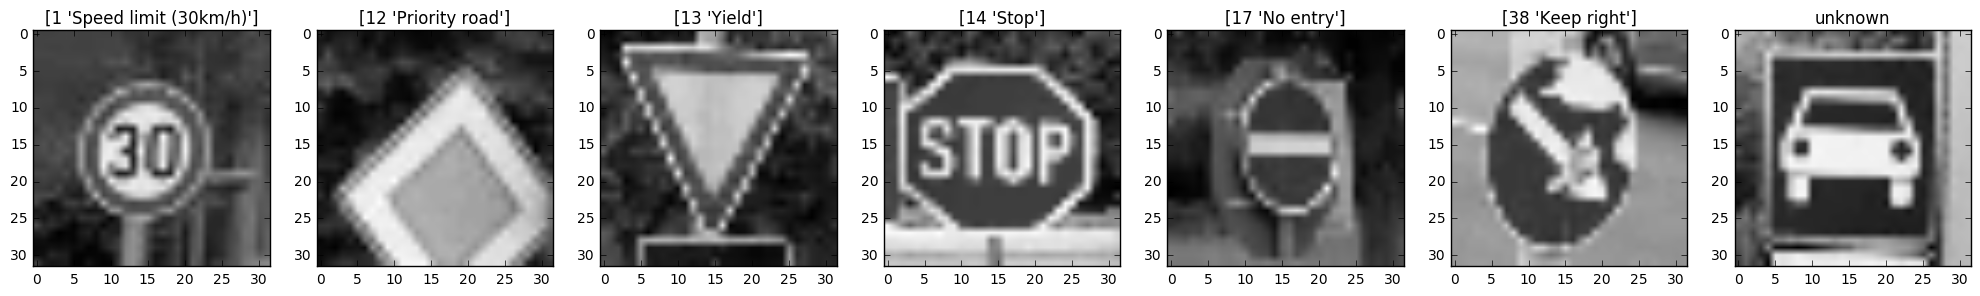

In [64]:
draw_images(signs_from_web_proccessed, squeeze=True, cmap='gray')

### Analyze Performance

In [65]:
# last example traffic sign is not in training set, set label to 0 to make sure evaluate function works
labels[-1] = 0

In [66]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
BATCH_SIZE = 128

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(signs_from_web_proccessed, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.714


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

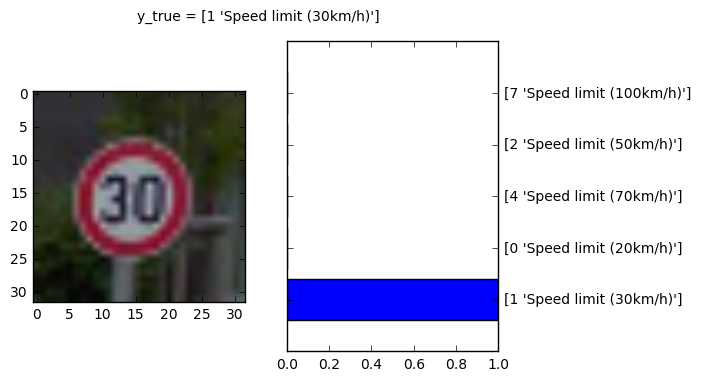

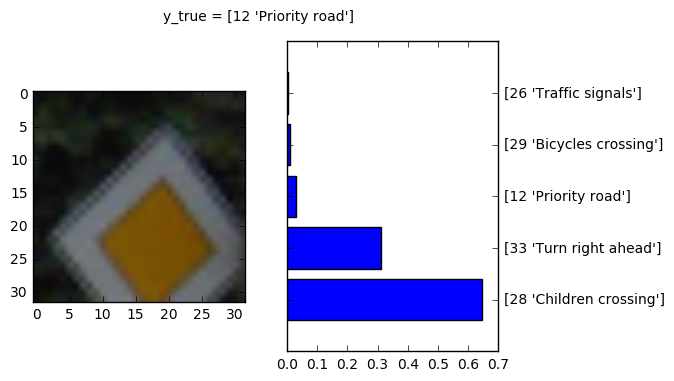

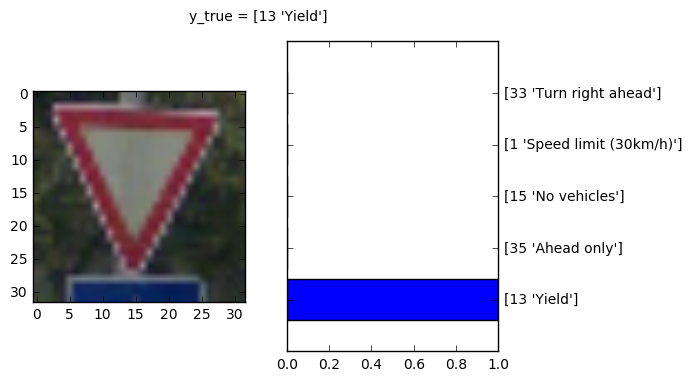

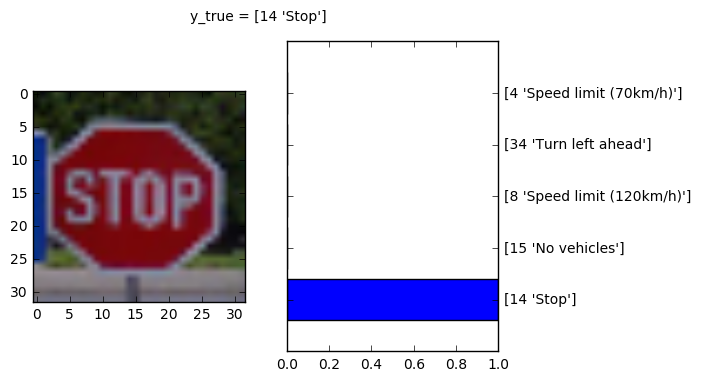

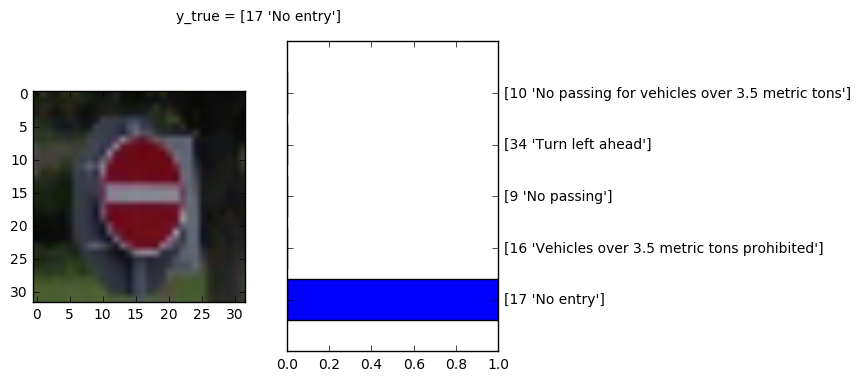

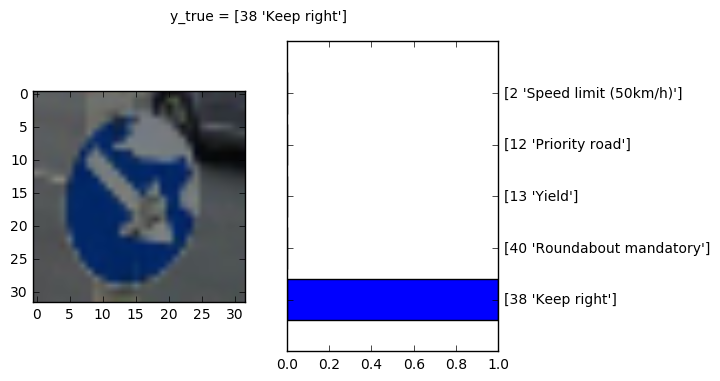

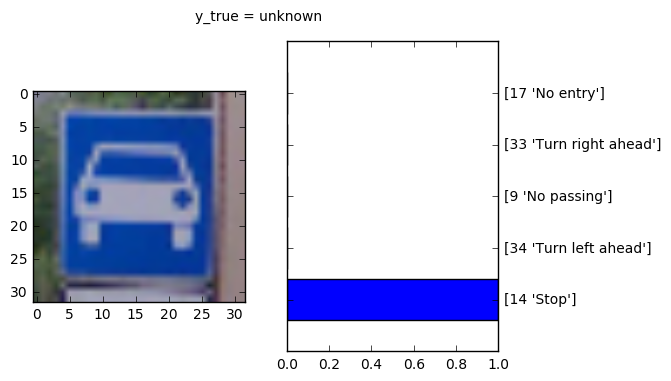

In [67]:
TOP_K = 5

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=TOP_K), feed_dict={x:signs_from_web_proccessed})

for i in range(len(img_files)):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False)
    # last image is not in training set
    if i == len(img_files)-1:
        f.suptitle("y_true = unknown")
    else:
        f.suptitle("y_true = {}".format(sign_names[labels[i]]))
    ax1.imshow(signs_from_web[i])
    ax2.barh(range(TOP_K), top.values[i], align='center')
    ax2.set_yticks(range(TOP_K))
    ax2.set_yticklabels( sign_names[top[1][i].astype(int)])
    ax2.tick_params(labelleft='off' , labelright='on')

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 